## Theoretical Introduction to Text Classification and NLP

Text classification is one of the core tasks in Natural Language Processing (NLP).  
In this laboratory, we focus on building a machine-learning model that automatically classifies text messages as **spam** or **ham** (not spam).  

### What is Spam Classification?

Spam detection is a binary classification problem in which the goal is to:
- assign label **1** → spam,
- assign label **0** → ham (legitimate message).

It is widely used in email filtering, SMS moderation, and security systems.

### NLP Preprocessing

Raw text cannot be directly used by machine-learning models.  
We must convert it into a numerical representation through several steps:

1. **Cleaning and normalization**  
   Lowercasing, removing punctuation, removing unnecessary characters.

2. **Tokenization**  
   Splitting text into individual words.

3. **Stop-word removal**  
   Removing very common words (e.g., *the*, *is*, *and*),  
   which carry little information for classification.

4. **Stemming**  
   Reducing words to crude roots  
   (*walking*, *walked* → *walk*).  
   Fast but produces artificial word forms.

5. **Lemmatization**  
   Reducing words to dictionary forms  
   (*better* → *good*, *cars* → *car*).  
   More accurate but slower.

### Vectorization

Machine-learning models require numerical input, so text must be converted into vectors:

- **Bag-of-Words (BoW)** — counts occurrences of each word.
- **TF-IDF** — measures how important a word is in a document relative to the whole dataset.

These methods transform text into a matrix that a classifier can use.

### Machine-Learning Models

For spam detection, common models include:
- **Multinomial Naive Bayes** — fast baseline model.
- **Logistic Regression** — strong linear classifier.
- **Linear SVM** — often achieves high accuracy.
- **Random Forest** — tree-based ensemble model.

Each model has different strengths in handling sparse, high-dimensional text data.

### Goal of the Laboratory

During the exercises, you will:
- preprocess and clean textual data,
- compare stemming and lemmatization,
- convert text into numerical features,
- train multiple ML models,
- evaluate and compare their performance,
- analyze which words are most strongly associated with spam.

This provides a complete workflow typical for real-world NLP classification tasks.


## Task 0 - Download data

This code automatically downloads the **SMS Spam Collection** dataset from the UCI Machine Learning Repository.  
It then extracts the ZIP file directly in memory, loads the raw text file into a pandas DataFrame, and finally saves it locally as `spam.csv`.

This allows you to use a real, publicly available spam–ham dataset without manually downloading or preparing any files.


In [1]:
import pandas as pd
import requests
import zipfile
import io

# Pobierz ZIP z UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
r = requests.get(url)

# Rozpakowanie z pamięci
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Odczyt pliku SMSSpamCollection
df = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    names=["v1", "v2"],
    encoding="latin-1"
)

# Zapis CSV w formacie jak Kaggle
df.to_csv("spam.csv", index=False, encoding="latin-1")

print("Utworzono spam.csv z UCI SMS Spam Collection!")
print(df.head())


Utworzono spam.csv z UCI SMS Spam Collection!
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Task 1 — Build a Basic SPAM/HAM Classifier

In this task, you will create a simple machine-learning model that classifies text messages as **spam** or **ham** (not spam).  
You will work with the SMS Spam Collection dataset from UCI.

### What you need to do:

1. **Load the dataset** (`spam.csv`) and keep two columns:
   - `label` (spam/ham)
   - `text` (message content)

2. **Convert labels**:
   - `ham` → `0`
   - `spam` → `1`

3. **Explore the dataset**:
   - Display the first few rows
   - Show how many spam and ham messages are in the dataset

4. **Split data** into training and test sets (80/20).
   Use `stratify=y` to preserve class distribution.

5. **Vectorize the text** using Bag-of-Words (`CountVectorizer`).

6. **Train a Multinomial Naive Bayes model** on the vectorized data.

7. **Evaluate the model** using:
   - Accuracy  
   - Precision (spam)  
   - Recall (spam)  
   - F1-score (spam)  
   - Confusion matrix  


In [2]:
# TASK 1 – Basic SPAM / HAM Classifier (Template)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# 1. Load the dataset.
# The file "spam.csv" must be located in the working directory.
# The dataset should contain at least two columns: one with labels and one with message text.
df = pd.read_csv("spam.csv", encoding="latin-1")

# Select the relevant columns and rename them.
# Typically, the dataset contains columns such as "v1" (label) and "v2" (text),
# along with several unused columns.
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# 2. Convert categorical labels into numerical form.
# The standard mapping is: "ham" → 0, "spam" → 1.
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Display a short preview and class distribution.
print(df.head())
print(df['label'].value_counts())

# 4. Define features and target variables.
# X should contain text messages, and y should contain the numerical labels.
X = df['text']
y = df['label_num']

# 5. Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Vectorize the text data using CountVectorizer.
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier.
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

# 7. Evaluate the classifier.
# Compute accuracy, precision (spam), recall (spam), F1-score (spam),
# and display the confusion matrix for detailed error analysis.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix\n', cm)


  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
label
ham     4825
spam     747
Name: count, dtype: int64
Accuracy: 0.9856502242152466
Precision: 0.9716312056737588
Recall: 0.9194630872483222
F1-score: 0.9448275862068966
Confusion Matrix
 [[962   4]
 [ 12 137]]


## Task 2 — Compare Text Preprocessing Techniques: No Cleaning vs. Stemming vs. Lemmatization

In this task, you will investigate how different text-cleaning approaches influence the performance of a machine-learning model.

You will compare **three versions** of the SMS dataset:

1. **No stemming or lemmatization**  
2. **With stemming** (PorterStemmer)  
3. **With lemmatization** (WordNetLemmatizer)

### Steps to complete:

1. Implement a `clean_text()` function that:
   - converts text to lowercase,  
   - removes punctuation and digits,  
   - tokenizes text,  
   - removes stopwords,  
   - optionally applies:
     - stemming (`mode="stem"`),
     - lemmatization (`mode="lemma"`),
     - or nothing (`mode="none"`).

2. Create 3 new columns in your DataFrame:
   - `text_clean_none`
   - `text_clean_stem`
   - `text_clean_lemma`

3. For each version of cleaned text:
   - split into train/test sets,
   - vectorize using **TF-IDF** (`TfidfVectorizer`),
   - train a **Logistic Regression** classifier,
   - compute precision, recall, and F1-score for the *spam* class.

4. Create a comparison table with:
   - accuracy,
   - precision (spam),
   - recall (spam),
   - F1-score (spam).

5. (optional) Consider following questions:
   - Which cleaning method performs best?
   - Does stemming produce unnatural word roots?
   - Does lemmatization create more interpretable features?
   - Does more preprocessing always mean better performance?



In [3]:
# Only for first use
 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# TASK 2

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def clean_text(text, mode="none"):
    """
    Clean and normalize text, optionally applying stemming or lemmatization.
    mode: "none" / "stem" / "lemma"
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    if mode == 'stem':
        tokens = [stemmer.stem(t) for t in tokens]
    elif mode == 'lemma':
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)


# Assume that the DataFrame `df` from Task 1 is already available
# and contains the columns: 'text' (raw messages) and 'label_num' (numeric labels).

# Apply text cleaning for all preprocessing variants
# Generate three cleaned text columns:
#  - text_clean_none  (no stemming/lemmatization)
#  - text_clean_stem  (stemming)
#  - text_clean_lemma (lemmatization)
# Each should be created using df['text'].apply(clean_text, ...).
df['text_clean_none'] = df['text'].apply(lambda x: clean_text(x, 'none'))
df['text_clean_stem'] = df['text'].apply(lambda x: clean_text(x, 'stem'))
df['text_clean_lemma'] = df['text'].apply(lambda x: clean_text(x, 'lemma'))


###Model Training and Evaluation for Each Preprocessing Variant
# For each version of the cleaned text (no preprocessing, stemming, lemmatization), the following procedure must be applied:

# 1. Split the data into training and test sets using stratified sampling to preserve label distribution.
# 2. Convert the textual data into numerical features using TF-IDF vectorization (`TfidfVectorizer`).
# 3. Train a Logistic Regression classifier on the vectorized training data.
# 4. Evaluate the model by computing precision, recall, and F1-score specifically for the *spam* class, as it is typically the minority class and harder to detect.

results = []

for name, col in [('none', 'text_clean_none'), ('stem', 'text_clean_stem'), ('lemma', 'text_clean_lemma')]:
    X_train, X_test, y_train, y_test = train_test_split(
        df[col], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
    )

    vec = TfidfVectorizer()
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_vec, y_train)
    preds = clf.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append({
        'variant': name,
        'accuracy': acc,
        'precision_spam': prec,
        'recall_spam': rec,
        'f1_spam': f1
    })

    print(f"Variant: {name}")
    print(classification_report(y_test, preds))

# Performance Comparison Table
# After evaluating all three preprocessing variants, construct a comparison table that includes the following metrics for each variant:

# - **Accuracy** — overall proportion of correct predictions.
# - **Precision (spam)** — proportion of messages predicted as spam that are actually spam.
# - **Recall (spam)** — proportion of true spam messages correctly detected by the model.
# - **F1-score (spam)** — harmonic mean of precision and recall, providing a balanced measure of classifier performance.

# This table will allow a direct comparison of how preprocessing choices influence the effectiveness of the spam-detection model.

results_df = pd.DataFrame(results)
print(results_df)


Variant: none
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Variant: stem
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Variant: lemma
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

  variant  accuracy  precision_spam  recall_spam   f1_spam
0    none  0.970404             1.0     0.778523  0.875472
1    stem  0.971300             1.0     0.785235  0.879699
2   lemma  0.970404             1.0     0.778523  0.875472


## Task 3 — Compare ML Models and Identify the Most “Spammy” Words

In this task, you will:
1. Train multiple machine-learning models,
2. Compare their performance,
3. Identify the most important words that indicate spam.

### Steps to complete:

1. Choose the best-performing text version from Task 2  
   (usually `text_clean_lemma`).  

2. Vectorize the text using **TF-IDF** with a limited vocabulary size  
   (e.g., `max_features=3000`).

3. Train and evaluate the following ML models:
   - **Multinomial Naive Bayes**
   - **Logistic Regression**
   - **Linear SVM (LinearSVC)**
   - **Random Forest Classifier**

4. For each model, compute:
   - Accuracy  
   - Precision (spam)  
   - Recall (spam)  
   - F1-score (spam)

5. Create a summary table comparing all models.

6. Select the best *linear* model  
   (Logistic Regression or LinearSVC).

7. Extract and display the top **20 most spam-indicative words**, based on:
   - highest positive coefficients → words strongly associated with spam  
   - lowest negative coefficients → words strongly associated with ham  

8. Plot horizontal bar charts showing the top 10 spam and ham words.

9. **Interpretation**:
   - What kinds of words typically appear in spam?  
   - What words are common in ham (normal) messages?  
   - Which ML model performed best, and why do you think so?


                model  accuracy  precision_spam  recall_spam   f1_spam
0       MultinomialNB  0.974888        0.991870     0.818792  0.897059
1  LogisticRegression  0.971300        1.000000     0.785235  0.879699
2           LinearSVC  0.982063        0.984962     0.879195  0.929078
3        RandomForest  0.978475        1.000000     0.838926  0.912409
Top spam words:
[('uk', np.float64(2.4715656509684165)), ('txt', np.float64(2.0090855811159405)), ('claim', np.float64(1.9533046162734924)), ('mobile', np.float64(1.9435559915173453)), ('service', np.float64(1.9125733923918578)), ('www', np.float64(1.557215780367007)), ('ringtone', np.float64(1.54011401889294)), ('video', np.float64(1.5260090744110466)), ('prize', np.float64(1.493008632425718)), ('reply', np.float64(1.4868941730285463)), ('tone', np.float64(1.4517211741603102)), ('stop', np.float64(1.4109635317498268)), ('ac', np.float64(1.3844147226737802)), ('urgent', np.float64(1.3630130801399951)), ('com', np.float64(1.35465576331078

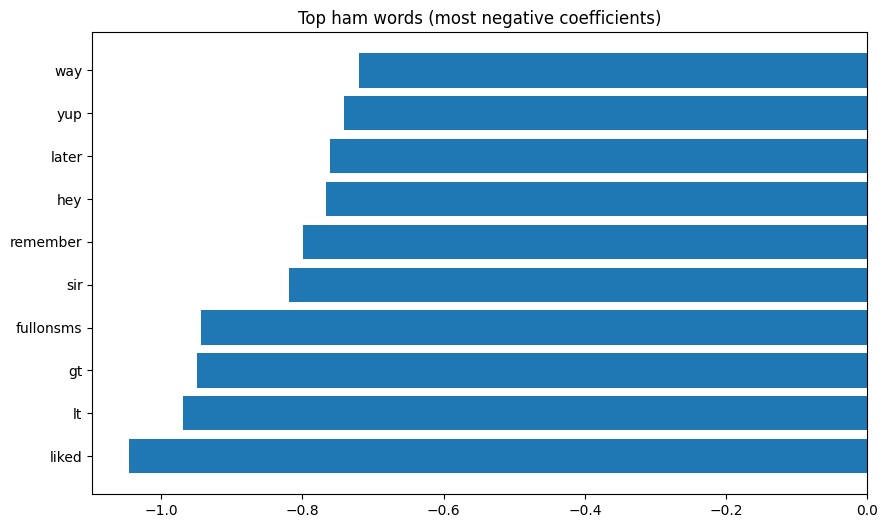

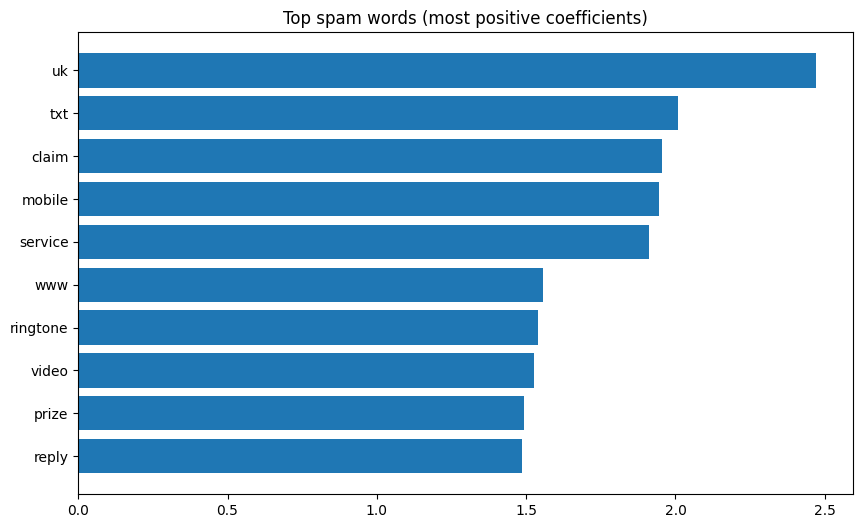

In [5]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

text_variant = df['text_clean_lemma']
labels = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    text_variant, labels, test_size=0.2, random_state=42, stratify=labels
)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'LinearSVC': LinearSVC(),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42)
}

model_results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    model_results.append({
        'model': name,
        'accuracy': acc,
        'precision_spam': prec,
        'recall_spam': rec,
        'f1_spam': f1
    })

results_table = pd.DataFrame(model_results)
print(results_table)

best_linear = None
for name in ['LogisticRegression', 'LinearSVC']:
    entry = results_table[results_table['model'] == name]
    if best_linear is None:
        best_linear = (name, entry['f1_spam'].values[0])
    else:
        if entry['f1_spam'].values[0] > best_linear[1]:
            best_linear = (name, entry['f1_spam'].values[0])

best_model_name = best_linear[0]
best_model = models[best_model_name]

feature_names = vectorizer.get_feature_names_out()
if hasattr(best_model, 'coef_'):
    coefs = best_model.coef_[0]
else:
    coefs = np.array([])

spam_idx = np.argsort(coefs)[-20:][::-1]
ham_idx = np.argsort(coefs)[:20]

spam_words = [(feature_names[i], coefs[i]) for i in spam_idx]
ham_words = [(feature_names[i], coefs[i]) for i in ham_idx]

print('Top spam words:')
print(spam_words)
print('Top ham words:')
print(ham_words)

spam_top10 = spam_words[:10][::-1]
ham_top10 = ham_words[:10]

plt.figure(figsize=(10, 6))
plt.barh([w for w, _ in ham_top10], [c for _, c in ham_top10])
plt.title('Top ham words (most negative coefficients)')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh([w for w, _ in spam_top10], [c for _, c in spam_top10])
plt.title('Top spam words (most positive coefficients)')
plt.show()
